In [2]:
# create genes table

import sqlite3
conn = sqlite3.connect("vutran.db")
c = conn.cursor()

c.execute(""" CREATE TABLE genes (id INT,
                                  name TXT,
                                  description TXT,
                                  organism TXT,
                                  nu_sequence TXT,
                                  chromosome TXT,
                                  start INT,
                                  end INT,
                                  strand VARCHAR(1),
                                  translated_sequence TXT);""")

In [3]:
# create enzymes table

c.execute(""" CREATE TABLE enzymes (id INT,
                                    name TXT,
                                    function TXT,
                                    ec_number TXT,
                                    organism TXT,
                                    aa_sequence);""")

In [4]:
# create pathways table

c.execute(""" CREATE TABLE pathways (id INT,
                                     name TXT,
                                     description TXT,
                                     organism TXT);""")

In [5]:
# create associative tables

c.execute("CREATE TABLE genes_in_enzymes (enzyme_id INT, gene_id INT);")
c.execute("CREATE TABLE enzymes_in_pathways (pathway_id INT, enzyme_id INT);")

In [6]:
# KEGG Pathway Database:
# glycolysis: https://www.genome.jp/kegg-bin/show_pathway?map00010
# TCA cycle: https://www.genome.jp/kegg-bin/show_pathway?map00020
# pentose phosphate: https://www.genome.jp/kegg-bin/show_pathway?map00030

# search pathway from KEGG database

from Bio.KEGG import REST

In [7]:
# get a list of all human pathways from KEGG

human_pathways = REST.kegg_list("pathway", "hsa").read()
human_pathways.decode("utf-8").split("\n")[0:5]

[u'path:hsa00010\tGlycolysis / Gluconeogenesis - Homo sapiens (human)',
 u'path:hsa00020\tCitrate cycle (TCA cycle) - Homo sapiens (human)',
 u'path:hsa00030\tPentose phosphate pathway - Homo sapiens (human)',
 u'path:hsa00040\tPentose and glucuronate interconversions - Homo sapiens (human)',
 u'path:hsa00051\tFructose and mannose metabolism - Homo sapiens (human)']

In [8]:
from Bio.KEGG.REST import *
from Bio.KEGG.KGML import KGML_parser
from Bio.KEGG.KGML.KGML_parser import read

def head(text, lines=10):
    """ Print the first lines lines of the passed text.
    """
    print '\n'.join(text.split('\n')[:lines] + ['[...]'])

head(kegg_get("hsa00010").read())

ENTRY       hsa00010                    Pathway
NAME        Glycolysis / Gluconeogenesis - Homo sapiens (human)
DESCRIPTION Glycolysis is the process of converting glucose into pyruvate and generating small amounts of ATP (energy) and NADH (reducing power). It is a central pathway that produces important precursor metabolites: six-carbon compounds of glucose-6P and fructose-6P and three-carbon compounds of glycerone-P, glyceraldehyde-3P, glycerate-3P, phosphoenolpyruvate, and pyruvate [MD:M00001]. Acetyl-CoA, another important precursor metabolite, is produced by oxidative decarboxylation of pyruvate [MD:M00307]. When the enzyme genes of this pathway are examined in completely sequenced genomes, the reaction steps of three-carbon compounds from glycerone-P to pyruvate form a conserved core module [MD:M00002], which is found in almost all organisms and which sometimes contains operon structures in bacterial genomes. Gluconeogenesis is a synthesis pathway of glucose from noncarbohydrate 

In [12]:
c.execute(""" INSERT INTO pathways (id, name, description, organism) 
VALUES (1, 'glycolysis', 'Glycolysis is the process of converting glucose into pyruvate and generating small amounts of ATP (energy) and NADH (reducing power). It is a central pathway that produces important precursor metabolites: six-carbon compounds of glucose-6P and fructose-6P and three-carbon compounds of glycerone-P, glyceraldehyde-3P, glycerate-3P, phosphoenolpyruvate, and pyruvate [MD:M00001]. Acetyl-CoA, another important precursor metabolite, is produced by oxidative decarboxylation of pyruvate [MD:M00307]. When the enzyme genes of this pathway are examined in completely sequenced genomes, the reaction steps of three-carbon compounds from glycerone-P to pyruvate form a conserved core module [MD:M00002], which is found in almost all organisms and which sometimes contains operon structures in bacterial genomes. Gluconeogenesis is a synthesis pathway of glucose from noncarbohydrate precursors. It is essentially a reversal of glycolysis with minor variations of alternative paths [MD:M00003].', 'human');""")
conn.commit()

c.execute(" SELECT*FROM pathways WHERE name='glycolysis';")
print(c.fetchone())

(1, u'glycolysis', u'Glycolysis is the process of converting glucose into pyruvate and generating small amounts of ATP (energy) and NADH (reducing power). It is a central pathway that produces important precursor metabolites: six-carbon compounds of glucose-6P and fructose-6P and three-carbon compounds of glycerone-P, glyceraldehyde-3P, glycerate-3P, phosphoenolpyruvate, and pyruvate [MD:M00001]. Acetyl-CoA, another important precursor metabolite, is produced by oxidative decarboxylation of pyruvate [MD:M00307]. When the enzyme genes of this pathway are examined in completely sequenced genomes, the reaction steps of three-carbon compounds from glycerone-P to pyruvate form a conserved core module [MD:M00002], which is found in almost all organisms and which sometimes contains operon structures in bacterial genomes. Gluconeogenesis is a synthesis pathway of glucose from noncarbohydrate precursors. It is essentially a reversal of glycolysis with minor variations of alternative paths [MD:M

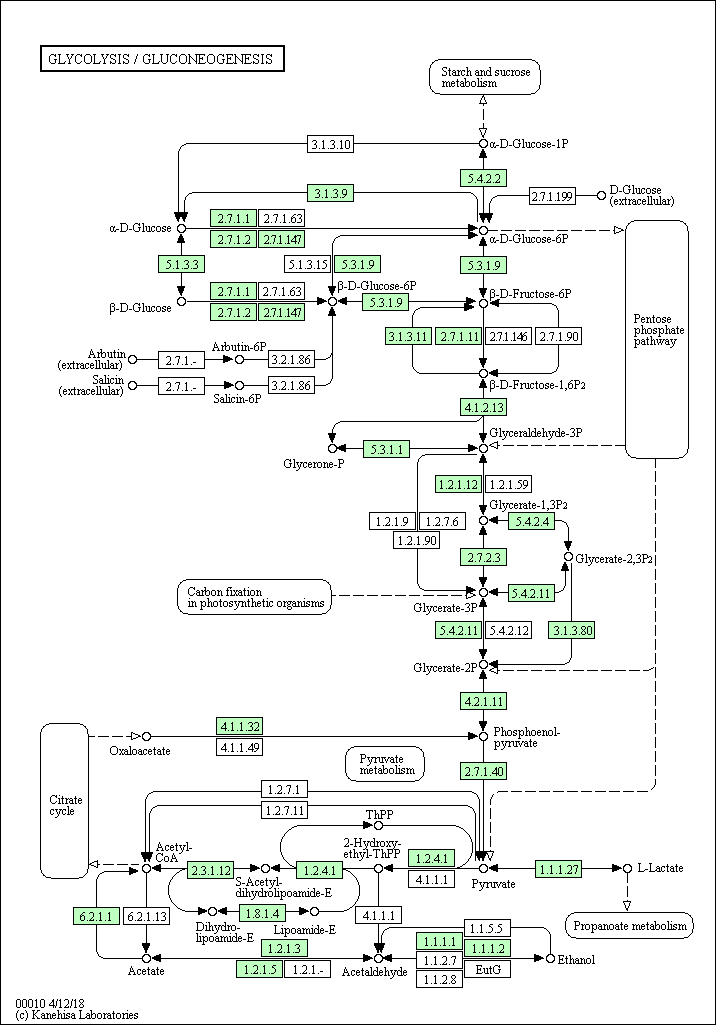

In [13]:
from IPython.display import Image, HTML

Image(kegg_get("hsa00010", "image").read())

In [14]:
""" from the image above, pick 4 enzymes:  
ec: 3.1.3.10
ec: 5.4.2.2
ec: 5.3.1.1
ec: 2.7.1.40"""

from Bio.KEGG import Enzyme

# save ec: 3.1.3.10 into a text file

!wget http://rest.kegg.jp/get/ec:3.1.3.10 -O hsa_ec_3.1.3.10.txt

--2018-09-20 00:01:48--  http://rest.kegg.jp/get/ec:3.1.3.10
Resolving rest.kegg.jp (rest.kegg.jp)... 133.103.200.77
Connecting to rest.kegg.jp (rest.kegg.jp)|133.103.200.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘hsa_ec_3.1.3.10.txt’

hsa_ec_3.1.3.10.txt     [  <=>               ]  30.35K  80.1KB/s    in 0.4s    

2018-09-20 00:01:49 (80.1 KB/s) - ‘hsa_ec_3.1.3.10.txt’ saved [31074]



In [15]:
# https://biopython.org/DIST/docs/api/Bio.KEGG.Enzyme.Record-class.html

records = Enzyme.parse(open('hsa_ec_3.1.3.10.txt'))
record = list(records)[0]
record.name # name in enzyme table

['glucose-1-phosphatase']

In [16]:
record.reaction # function in enzyme table

['alpha-D-glucose 1-phosphate + H2O = D-glucose + phosphate [RN:R00304]']

In [17]:
record.entry # ec_number in enzyme table

'3.1.3.10'

In [22]:
# input these data into enzyme table for ec: 3.1.3.10

c.execute(""" INSERT INTO enzymes (id, name, function, ec_number, organism)
                        VALUES    (1, ?, ?, ?, 'human'),""" (str(record.name), str(record.reaction), str(record.entry))
conn.commit()

c.execute("SELECT*FROM enzymes WHERE ec_number='3.1.3.10';")

SyntaxError: invalid syntax (<ipython-input-22-f86b13fe2c17>, line 5)